In [12]:
import pandas as pd
import numpy as np
import random

In [13]:
pd.options.mode.chained_assignment = None

In [14]:
df = pd.read_csv('data/incident_event_log.csv')
df.shape

(141712, 36)

In [15]:
df.head(10)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
5,INC0000047,Active,True,1,0,1,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
6,INC0000047,Active,True,1,0,2,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
7,INC0000047,Active,True,1,0,3,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
8,INC0000047,Active,True,1,0,4,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
9,INC0000047,Active,True,1,0,5,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

Atributi koji označavaju vreme neke akcije nisu od posebne važnosti za učenje modela.

In [17]:
timestamp_features = ['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']
df.drop(columns=timestamp_features, inplace=True)

Neispravna vrednost se pojavljuje za atribut incident_state. Vrste sa tom vrednošću se mogu ukloniti.

In [19]:
df['incident_state'].value_counts()

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

In [20]:
df = df[df['incident_state'] != '-100' ]

In [21]:
df.shape

(141707, 31)

Kako bi se kasnije lakše razlikovali tipovi čvorova pri konstrukciji grafa, dobra je ideja da se glavni skup podataka podeli na više tabela koje odgovaraju svakom entitetu (`incident`, `support_org`, `customer`, `vendor`).

In [18]:
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'sys_created_by', 'sys_updated_by', 'contact_type', 'location',
       'category', 'subcategory', 'u_symptom', 'cmdb_ci', 'impact', 'urgency',
       'priority', 'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by'],
      dtype='object')

In [22]:
incident_cols = ['number', 'incident_state', 'active', 'reassignment_count',
        'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id','sys_created_by', 'sys_updated_by', 
        'contact_type', 'location', 'category', 'subcategory', 'u_symptom', 'cmdb_ci', 'impact', 'urgency',
        'priority', 'knowledge', 'u_priority_confirmation', 'notify', 'problem_id', 'rfc',
        'caused_by', 'closed_code', 'resolved_by']
support_org_cols = ['number', 'assignment_group', 'assigned_to']
customer_cols = ['number', 'opened_by']
vendor_cols = ['number', 'vendor']

Pomoćna funkcija za proveru broja nedostajućih vrednosti

In [23]:
def count_missing(df, col):
    return sum(df[col].values == '?')

In [24]:
def exctractIds(value):
    return value.split(sep=' ')[-1]

### Tabela support_org

In [25]:
df_support_org = df[support_org_cols]

In [26]:
df_support_org.head(10)

,number,assignment_group,assigned_to
0,INC0000045,Group 56,?
1,INC0000045,Group 56,?
2,INC0000045,Group 56,?
3,INC0000045,Group 56,?
4,INC0000047,Group 70,Resolver 89
5,INC0000047,Group 24,Resolver 31
6,INC0000047,Group 24,Resolver 31
7,INC0000047,Group 24,Resolver 31
8,INC0000047,Group 24,Resolver 31
9,INC0000047,Group 24,Resolver 31


Prefiksi `Group` i `Resolver` nemaju nikakvo značenje, pa se mogu izvući samo numeričke vrednosti.

In [29]:
for col in support_org_cols[1:]:
    df_support_org[col] = df_support_org[col].apply(exctractIds)

In [30]:
df_support_org.head(10)

,number,assignment_group,assigned_to
0,INC0000045,56,?
1,INC0000045,56,?
2,INC0000045,56,?
3,INC0000045,56,?
4,INC0000047,70,89
5,INC0000047,24,31
6,INC0000047,24,31
7,INC0000047,24,31
8,INC0000047,24,31
9,INC0000047,24,31


In [31]:
[count_missing(df_support_org, 'assignment_group'), count_missing(df_support_org, 'assigned_to')]

[14213, 27496]

Vrednost `?` može da se posmatra kao posebna vrednost, pošto označava podatke koji su skriveni zbog privatnosti a ne kao nedostajuće vrednosti.

In [32]:
df_support_org['assignment_group'] = df_support_org['assignment_group'].replace(to_replace='?', value='1').astype(int)
df_support_org['assigned_to'] = df_support_org['assigned_to'].replace(to_replace='?', value='1').astype(int)

In [33]:
df_support_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141707 entries, 0 to 141711
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   number            141707 non-null  object
 1   assignment_group  141707 non-null  int32 
 2   assigned_to       141707 non-null  int32 
dtypes: int32(2), object(1)
memory usage: 3.2+ MB


### Tabela customer

Kao i u prethodnom primeru, prefiks 'Opened by' kod vrednosti kolone `opened_by` se može izostaviti.

In [34]:
df_customer = df[customer_cols]
df_customer.head(10)

,number,opened_by
0,INC0000045,Opened by 8
1,INC0000045,Opened by 8
2,INC0000045,Opened by 8
3,INC0000045,Opened by 8
4,INC0000047,Opened by 397
5,INC0000047,Opened by 397
6,INC0000047,Opened by 397
7,INC0000047,Opened by 397
8,INC0000047,Opened by 397
9,INC0000047,Opened by 397


In [36]:
df_customer['opened_by'] = df_customer['opened_by'].apply(exctractIds)

In [37]:
df_customer.head(10)

,number,opened_by
0,INC0000045,8
1,INC0000045,8
2,INC0000045,8
3,INC0000045,8
4,INC0000047,397
5,INC0000047,397
6,INC0000047,397
7,INC0000047,397
8,INC0000047,397
9,INC0000047,397


In [38]:
count_missing(df_customer, 'opened_by')

4835

In [39]:
df_customer['opened_by'].unique()

array(['8', '397', '180', '131', '24', '40', '433', '62', '501', '301',
       '4', '55', '257', '128', '221', '386', '240', '325', '381', '185',
       '191', '59', '239', '305', '443', '390', '512', '461', '536', '9',
       '?', '226', '316', '120', '168', '503', '228', '155', '517', '247',
       '444', '124', '47', '20', '431', '237', '441', '79', '505', '468',
       '502', '267', '360', '142', '188', '174', '419', '317', '385',
       '392', '460', '322', '2', '524', '533', '75', '157', '356', '402',
       '368', '364', '12', '44', '193', '453', '17', '108', '351', '70',
       '520', '465', '184', '58', '80', '10', '172', '467', '296', '119',
       '528', '277', '423', '253', '60', '337', '369', '464', '91', '298',
       '3', '500', '262', '39', '515', '530', '321', '319', '94', '255',
       '73', '412', '246', '382', '109', '163', '242', '32', '463', '68',
       '106', '320', '46', '350', '293', '354', '111', '535', '469',
       '403', '147', '230', '219', '182', '151', 

Nedostajuća vrednost `?` može da se posmatra kao posebna vrednost. Neka se `?` preslikava u neku numeričku vrednost, npr. 1.

In [40]:
df_customer['opened_by'].replace(to_replace='?', value='1', inplace=True)

In [41]:
count_missing(df_customer, 'opened_by')

0

In [42]:
df_customer['opened_by'] = df_customer['opened_by'].astype(int)

In [43]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141707 entries, 0 to 141711
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   number     141707 non-null  object
 1   opened_by  141707 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 2.7+ MB


### Tabela vendor

In [44]:
df_vendor = df[vendor_cols]

In [45]:
df_vendor.head(10)

,number,vendor
0,INC0000045,?
1,INC0000045,?
2,INC0000045,?
3,INC0000045,?
4,INC0000047,?
5,INC0000047,?
6,INC0000047,?
7,INC0000047,?
8,INC0000047,?
9,INC0000047,?


In [46]:
df_vendor['vendor'].value_counts()

?           141463
code 8s        167
Vendor 1        69
Vendor 3         6
Vendor 2         2
Name: vendor, dtype: int64

Kolona vendor sadrži veliki broj skrivenih vrednosti s obzirom da su u pitanju osetljivi podaci. Kako je ova kolona bitna za tip čvora vendor, bolje je zameniti ove vrednosti drugim vrednostima na nasumičan način (iako nije idealno rešenje).

In [47]:
vendor_list = list(df_vendor['vendor'].value_counts().keys()[1:])
vendor_list

['code 8s', 'Vendor 1', 'Vendor 3', 'Vendor 2']

In [48]:
vendor_weights = df_vendor['vendor'].value_counts().values[1:]
vendor_weights

array([167,  69,   6,   2], dtype=int64)

In [49]:
mask = df_vendor['vendor'].values == '?'

In [50]:
num_missing = sum(mask)
num_missing

141463

In [51]:
df_vendor['vendor'].values[mask] = random.choices(vendor_list, weights=vendor_weights, k=num_missing)
df_vendor['vendor'].value_counts()

code 8s     96951
Vendor 1    40081
Vendor 3     3456
Vendor 2     1219
Name: vendor, dtype: int64

### Tabela incident

In [52]:
pd.set_option('display.max_columns', None)  

In [53]:
df_incident = df[incident_cols]
df_incident.head(10)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,sys_created_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,knowledge,u_priority_confirmation,notify,problem_id,rfc,caused_by,closed_code,resolved_by
0,INC0000045,New,True,0,0,0,True,Caller 2403,Created by 6,Updated by 21,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,?,?,code 5,Resolved by 149
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Created by 6,Updated by 642,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,?,?,code 5,Resolved by 149
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Created by 6,Updated by 804,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,?,?,code 5,Resolved by 149
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Created by 6,Updated by 908,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,?,?,code 5,Resolved by 149
4,INC0000047,New,True,0,0,0,True,Caller 2403,Created by 171,Updated by 746,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,?,?,code 5,Resolved by 81
5,INC0000047,Active,True,1,0,1,True,Caller 2403,Created by 171,Updated by 21,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,?,?,code 5,Resolved by 81
6,INC0000047,Active,True,1,0,2,True,Caller 2403,Created by 171,Updated by 21,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,?,?,code 5,Resolved by 81
7,INC0000047,Active,True,1,0,3,True,Caller 2403,Created by 171,Updated by 804,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,?,?,code 5,Resolved by 81
8,INC0000047,Active,True,1,0,4,True,Caller 2403,Created by 171,Updated by 703,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,?,?,code 5,Resolved by 81
9,INC0000047,Active,True,1,0,5,True,Caller 2403,Created by 171,Updated by 332,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,?,?,code 5,Resolved by 81


In [54]:
df_incident.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
sys_created_by             object
sys_updated_by             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc                        object
caused_by                  object
closed_code                object
resolved_by                object
dtype: object

In [55]:
cols_with_missing_vals = []
for col in incident_cols:
    if df_incident.dtypes[col] == 'O':
        num_missing = count_missing(df_incident, col)
        print(f'num missing for {col}: {num_missing}')
        if num_missing > 0 and num_missing < 100000:
            cols_with_missing_vals.append(col)

num missing for number: 0
num missing for incident_state: 0
num missing for caller_id: 29
num missing for sys_created_by: 53076
num missing for sys_updated_by: 0
num missing for contact_type: 0
num missing for location: 76
num missing for category: 78
num missing for subcategory: 111
num missing for u_symptom: 32959
num missing for cmdb_ci: 141262
num missing for impact: 0
num missing for urgency: 0
num missing for priority: 0
num missing for notify: 0
num missing for problem_id: 139412
num missing for rfc: 140716
num missing for caused_by: 141684
num missing for closed_code: 714
num missing for resolved_by: 226


Kolone cmdb_ci, problem_id, rfc, caused_by imaju preveliki broj nedostajućih vrednosti i nisu relevantne za sam objekat incident pa se mogu izostaviti.

In [56]:
df_incident.drop(columns=['cmdb_ci', 'problem_id', 'rfc', 'caused_by'], inplace=True)

In [59]:
format_cols = ['caller_id', 'sys_created_by', 'sys_updated_by', 'location', 'category', 'subcategory', 'u_symptom', 'closed_code', 'resolved_by']
for col in format_cols:
    df_incident[col] = df[col].apply(exctractIds)

Kolone u kojima se može izostaviti sufiks (npr. `2 - Medium`)

In [60]:
for col in ['impact', 'urgency','priority']:
    df_incident[col] = df_incident[col].map(lambda x: x.split(sep=' ')[0], na_action=None).astype(int)

In [61]:
df_incident.head(10)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,sys_created_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,knowledge,u_priority_confirmation,notify,closed_code,resolved_by
0,INC0000045,New,True,0,0,0,True,2403,6,21,Phone,143,55,170,72,2,2,3,True,False,Do Not Notify,5,149
1,INC0000045,Resolved,True,0,0,2,True,2403,6,642,Phone,143,55,170,72,2,2,3,True,False,Do Not Notify,5,149
2,INC0000045,Resolved,True,0,0,3,True,2403,6,804,Phone,143,55,170,72,2,2,3,True,False,Do Not Notify,5,149
3,INC0000045,Closed,False,0,0,4,True,2403,6,908,Phone,143,55,170,72,2,2,3,True,False,Do Not Notify,5,149
4,INC0000047,New,True,0,0,0,True,2403,171,746,Phone,165,40,215,471,2,2,3,True,False,Do Not Notify,5,81
5,INC0000047,Active,True,1,0,1,True,2403,171,21,Phone,165,40,215,471,2,2,3,True,False,Do Not Notify,5,81
6,INC0000047,Active,True,1,0,2,True,2403,171,21,Phone,165,40,215,471,2,2,3,True,False,Do Not Notify,5,81
7,INC0000047,Active,True,1,0,3,True,2403,171,804,Phone,165,40,215,471,2,2,3,True,False,Do Not Notify,5,81
8,INC0000047,Active,True,1,0,4,True,2403,171,703,Phone,165,40,215,471,2,2,3,True,False,Do Not Notify,5,81
9,INC0000047,Active,True,1,0,5,True,2403,171,332,Phone,165,40,215,471,2,2,3,True,False,Do Not Notify,5,81


In [62]:
cols_with_missing_vals

['caller_id',
 'sys_created_by',
 'location',
 'category',
 'subcategory',
 'u_symptom',
 'closed_code',
 'resolved_by']

In [63]:
for col in cols_with_missing_vals:
    print(f'{col} {str(1) in df_incident[col].values}')

caller_id False
sys_created_by True
location False
category False
subcategory False
u_symptom False
closed_code True
resolved_by False


In [64]:
cols_with_missing_vals.remove('sys_created_by')
cols_with_missing_vals.remove('closed_code')

In [65]:
'9' in df_incident['sys_created_by'].values

False

In [66]:
'18' in df_incident['closed_code'].values

False

In [67]:
df_incident['sys_created_by'] = df_incident['sys_created_by'].replace(to_replace='?', value='9').astype(int)
df_incident['closed_code'] = df_incident['closed_code'].replace(to_replace='?', value='18').astype(int)

In [68]:
for col in cols_with_missing_vals:
    df_incident[col] = df_incident[col].replace(to_replace='?', value='1').astype(int)

In [69]:
df_incident.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                   int32
sys_created_by              int32
sys_updated_by             object
contact_type               object
location                    int32
category                    int32
subcategory                 int32
u_symptom                   int32
impact                      int32
urgency                     int32
priority                    int32
knowledge                    bool
u_priority_confirmation      bool
notify                     object
closed_code                 int32
resolved_by                 int32
dtype: object

In [70]:
df_incident['sys_updated_by'] = df_incident['sys_updated_by'].astype(int)

In [71]:
df_incident['notify'].value_counts()

Do Not Notify    141588
Send Email          119
Name: notify, dtype: int64

In [72]:
df_incident['notify'].replace({'Do Not Notify': 0, 'Send Email': 1}, inplace=True)

In [73]:
target = (df_incident['reassignment_count'] > 0).astype(int)
df_incident.drop(columns=['reassignment_count'], inplace=True)

In [74]:
df_incident['contact_type'].value_counts()

Phone             140457
Self service         995
Email                220
IVR                   18
Direct opening        17
Name: contact_type, dtype: int64

In [75]:
df_incident['incident_state'].value_counts()

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
Name: incident_state, dtype: int64

In [76]:
bool_cols = df_incident.select_dtypes('bool')

In [77]:
for col in bool_cols:
    df_incident[col] = df_incident[col].astype(int)

In [88]:
target.value_counts()

1    71833
0    69874
Name: reassignment_count, dtype: int64

Zastupljenost klasa je skoro jednaka.

<BarContainer object of 2 artists>

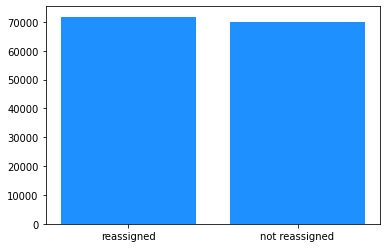

In [79]:
import matplotlib.pyplot as plt

plt.bar(['reassigned', 'not reassigned'], target.value_counts(), color='dodgerblue')

Čuvanje prečišćenih tabela za korišćenje u narednim koracima.

In [137]:
df_support_org.to_csv('data/support_orgs.csv')

In [138]:
df_vendor.to_csv('data/vendors.csv')

In [139]:
df_customer.to_csv('data/customers.csv')

In [82]:
df_incident.to_csv('data/incidents.csv')

In [84]:
target.values

array([0, 0, 0, ..., 1, 1, 1])

In [90]:
import torch
target_tensor = torch.tensor(target.values).to(torch.float)

In [91]:
torch.save(target_tensor, 'data/target.pt')